In [52]:
import pandas as pd
import numpy as np


# Read the data
df = pd.read_csv('C:/Users/carsk/OneDrive - KU Leuven/Thesis/Revised_RESULTS/Baseflow/WOL4-C01/1H_resampl.csv', parse_dates=True, index_col='date')


#erase column 0 and 1
#df = df.drop(df.columns[[0, 1]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2016-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   C01                   26301 non-null  float64
 1   Baseflow              26304 non-null  float64
 2   C01_without_baseflow  26301 non-null  float64
 3   WOL4                  26278 non-null  float64
dtypes: float64(4)
memory usage: 1.0 MB


In [53]:
#drop nan values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26278 entries, 2016-01-01 00:00:00 to 2018-12-31 00:00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   C01                   26278 non-null  float64
 1   Baseflow              26278 non-null  float64
 2   C01_without_baseflow  26278 non-null  float64
 3   WOL4                  26278 non-null  float64
dtypes: float64(4)
memory usage: 1.0 MB


In [54]:
data = df.rename(columns={'C01_without_baseflow': 'Qo', 'WOL4': 'Qs'})

# Calculating Model Bias
model_bias = (data['Qs'] - data['Qo']).sum() / data['Qo'].sum()

# Calculating Model Confidence
Qo_mean = data['Qo'].mean()
model_confidence = (data['Qs'] - Qo_mean).sum() / ((data['Qo'] - Qo_mean)**2).sum()

# Calculating Nash-Sutcliffe Efficiency
nash_sutcliffe_efficiency = (((data['Qo'] - Qo_mean)**2).sum() - ((data['Qo'] - data['Qs'])**2).sum()) / ((data['Qo'] - Qo_mean)**2).sum()

# Calculating Nash-Sutcliffe Efficiency High Flow
nash_sutcliffe_efficiency_high_flow = ((data['Qo'] + Qo_mean) * (data['Qs'] - data['Qo'])**2).sum() / ((data['Qo'] + Qo_mean) * (data['Qo'] - Qo_mean)**2).sum()

#calculate the RMSE
rmse1 = np.sqrt(((data['Qs'] - data['Qo'])**2).sum() / len(data))
print('NSE1=  %.3f' % nash_sutcliffe_efficiency)
print('NSE High flow=  %.3f' % nash_sutcliffe_efficiency_high_flow)
print('Model confidence=  %.3f' % model_confidence)
print('Model bias=  %.3f' % model_bias)
print('RMSE=  %.3f' % rmse1)

NSE1=  -1.974
NSE High flow=  4.764
Model confidence=  0.119
Model bias=  0.090
RMSE=  0.275


In [55]:
#drop 0 values from df of colum WOL4

df_0 = df[df['WOL4'] != 0]
df_0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3545 entries, 2016-01-01 00:00:00 to 2018-12-30 22:00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   C01                   3545 non-null   float64
 1   Baseflow              3545 non-null   float64
 2   C01_without_baseflow  3545 non-null   float64
 3   WOL4                  3545 non-null   float64
dtypes: float64(4)
memory usage: 138.5 KB


In [56]:
data0 = df.rename(columns={'C01_without_baseflow': 'Qo', 'WOL4': 'Qs'})

# Calculating Model Bias
model_bias = (data0['Qs'] - data0['Qo']).sum() / data0['Qo'].sum()

# Calculating Model Confidence
Qo_mean = data0['Qo'].mean()
model_confidence = (data0['Qs'] - Qo_mean).sum() / ((data0['Qo'] - Qo_mean)**2).sum()

# Calculating Nash-Sutcliffe Efficiency
nash_sutcliffe_efficiency = (((data0['Qo'] - Qo_mean)**2).sum() - ((data0['Qo'] - data0['Qs'])**2).sum()) / ((data0['Qo'] - Qo_mean)**2).sum()

# Calculating Nash-Sutcliffe Efficiency High Flow
nash_sutcliffe_efficiency_high_flow = ((data0['Qo'] + Qo_mean) * (data0['Qs'] - data0['Qo'])**2).sum() / ((data0['Qo'] + Qo_mean) * (data0['Qo'] - Qo_mean)**2).sum()

#calculate the RMSE
rmse1 = np.sqrt(((data0['Qs'] - data0['Qo'])**2).sum() / len(data0))
print('NSE1=  %.3f' % nash_sutcliffe_efficiency)
print('NSE High flow=  %.3f' % nash_sutcliffe_efficiency_high_flow)
print('Model confidence=  %.3f' % model_confidence)
print('Model bias=  %.3f' % model_bias)
print('RMSE=  %.3f' % rmse1)

NSE1=  -1.974
NSE High flow=  4.764
Model confidence=  0.119
Model bias=  0.090
RMSE=  0.275


In [57]:
df_0.head()

C01    Baseflow  C01_without_baseflow      WOL4
date                                                                       
2016-01-01 00:00:00   56.833333   71.750000              0.000000  0.005912
2016-01-01 01:00:00  523.166667   59.583333              0.463917  0.719726
2016-01-01 12:00:00  103.916667  138.833333              0.000000  0.002884
2016-01-01 13:00:00  103.833333  130.250000              0.000000  0.030430
2016-01-02 01:00:00   47.833333   59.583333              0.000000  0.027478

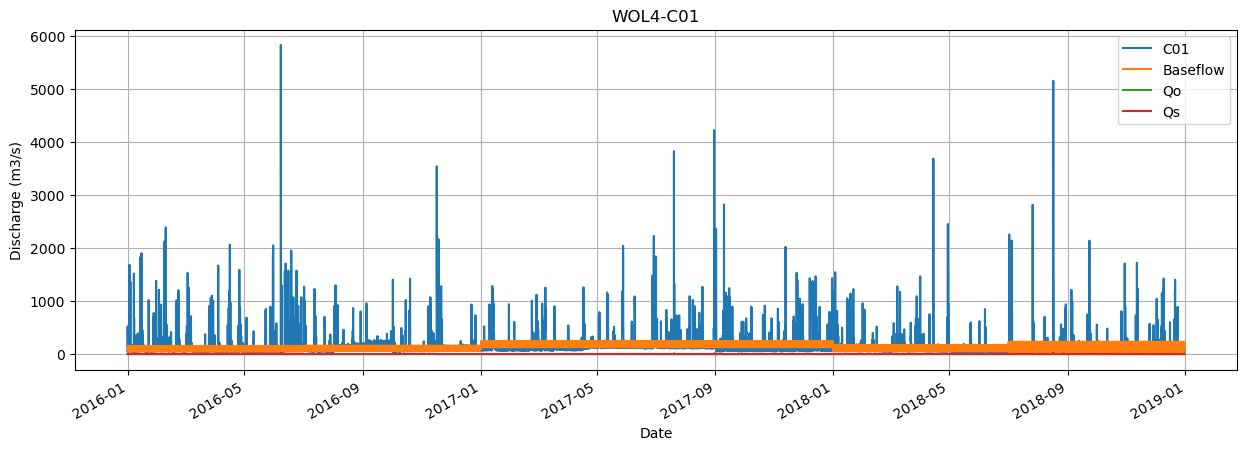

In [58]:
plot = data0.plot(figsize=(15, 5))
plot.set_ylabel('Discharge (m3/s)')
plot.set_xlabel('Date')
plot.set_title('WOL4-C01')
plot.legend(loc='upper right')
plot.grid(True)


In [74]:
import plotly.graph_objects as go

# Create traces
trace1 = go.Scatter(
    x = data0.index,   # Dates on the x-axis
    y = data0['Qo'],  # C01_without_baseflow values on the y-axis
    mode = 'lines',
    name = 'C01 without baseflow',
    line = dict(color = 'blue')  # Corrected line
)

trace2 = go.Scatter(
    x = data0.index,   # Dates on the x-axis
    y = data0['Qs'],  # WOL4 values on the y-axis
    mode = 'lines',
    name = 'WOL4',
    line = dict(color = 'orange')  # Corrected line
)

trace3 = go.Scatter(
    x = data0.index,   # Dates on the x-axis
    y = data0['C01']/1000,  # C01_without_baseflow values on the y-axis
    mode = 'lines',
    name = 'C01 with baseflow',
    line = dict(color = 'blue')  # Corrected line
)

layout = go.Layout(
    #title='WOL4-C01',
    xaxis=dict(
        title='Date',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Discharge (lt/s)',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    showlegend=True,
    legend=dict(
        x=0.8,
        y=0.9
    ),
    paper_bgcolor='rgb(255,255,255)',  # Color of the entire figure background
    plot_bgcolor='rgb(245,245,245)'  # Color of the area inside the plot
)

data = [trace2]

fig = go.Figure(data=data, layout=layout)
fig.show()



In [87]:
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display

# Create two date picker widgets
start_date_picker = widgets.DatePicker(description='Start Date')
end_date_picker = widgets.DatePicker(description='End Date')

# Function to update the plot based on selected dates
def update_plot(start_date, end_date):
    filtered_data = data0.loc[start_date:end_date]  # Filter data based on selected dates
    
    # Create traces with filtered data
    trace1 = go.Scatter(
        x = filtered_data.index,
        y = filtered_data['Qo'],
        mode = 'lines',
        name = 'C01 without baseflow',
        line = dict(color = 'blue')
    )

    trace2 = go.Scatter(
        x = filtered_data.index,
        y = filtered_data['Qs'],
        mode = 'lines',
        name = 'WOL4',
        line = dict(color = 'orange')
    )

    trace3 = go.Scatter(
        x = filtered_data.index,
        y = filtered_data['C01']/1000,
        mode = 'lines',
        name = 'C01 with baseflow',
        line = dict(color = 'blue')
    )

    # Layout
    layout = go.Layout(
        xaxis=dict(
            title='Date',
            gridcolor='rgb(255, 255, 255)',
            zerolinewidth=1,
            ticklen=5,
            gridwidth=2,
        ),
        yaxis=dict(
            title='Discharge (lt/s)',
            gridcolor='rgb(255, 255, 255)',
            zerolinewidth=1,
            ticklen=5,
            gridwidth=2,
        ),
        showlegend=False,
        legend=dict(
            x=0.8,
            y=0.9
        ),
        paper_bgcolor='rgb(255,255,255)',  # Color of the entire figure background
        plot_bgcolor='rgb(245,245,245)'  # Color of the area inside the plot
    )

    # Data
    data = [trace2, trace3]

    # Create a figure
    fig = go.Figure(data=data, layout=layout)
    
    # Display the figure
    fig.show()

# Function to handle date pickers' events
def on_dates_change(change):
    update_plot(start_date_picker.value, end_date_picker.value)

# Listen to date pickers' changes
start_date_picker.observe(on_dates_change, names='value')
end_date_picker.observe(on_dates_change, names='value')

# Display date pickers
display(start_date_picker, end_date_picker)



DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

In [88]:
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display

# Create two date picker widgets
start_date_picker = widgets.DatePicker(description='Start Date')
end_date_picker = widgets.DatePicker(description='End Date')

# Function to update the plot based on selected dates
def update_plot(start_date, end_date):
    filtered_data = data0.loc[start_date:end_date]  # Filter data based on selected dates
    
    # Create traces with filtered data
    trace1 = go.Scatter(
        x = filtered_data.index,
        y = filtered_data['Qo'],
        mode = 'lines',
        name = 'C01 without baseflow',
        line = dict(color = 'blue')
    )

    trace2 = go.Scatter(
        x = filtered_data.index,
        y = filtered_data['Qs'],
        mode = 'lines',
        name = 'WOL4',
        line = dict(color = 'orange')
    )

    trace3 = go.Scatter(
        x = filtered_data.index,
        y = filtered_data['C01']/1000,
        mode = 'lines',
        name = 'C01 with baseflow',
        line = dict(color = 'blue')
    )

    # Layout
    layout = go.Layout(
        xaxis=dict(
            title='Date',
            gridcolor='rgb(255, 255, 255)',
            zerolinewidth=1,
            ticklen=5,
            gridwidth=2,
        ),
        yaxis=dict(
            title='Discharge (lt/s)',
            gridcolor='rgb(255, 255, 255)',
            zerolinewidth=1,
            ticklen=5,
            gridwidth=2,
        ),
        showlegend=False,
        legend=dict(
            x=0.8,
            y=0.9
        ),
        paper_bgcolor='rgb(255,255,255)',  # Color of the entire figure background
        plot_bgcolor='rgb(245,245,245)'  # Color of the area inside the plot
    )

    # Data
    data = [trace1, trace2]

    # Create a figure
    fig = go.Figure(data=data, layout=layout)
    
    # Display the figure
    fig.show()

# Function to handle date pickers' events
def on_dates_change(change):
    update_plot(start_date_picker.value, end_date_picker.value)

# Listen to date pickers' changes
start_date_picker.observe(on_dates_change, names='value')
end_date_picker.observe(on_dates_change, names='value')

# Display date pickers
display(start_date_picker, end_date_picker)



DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

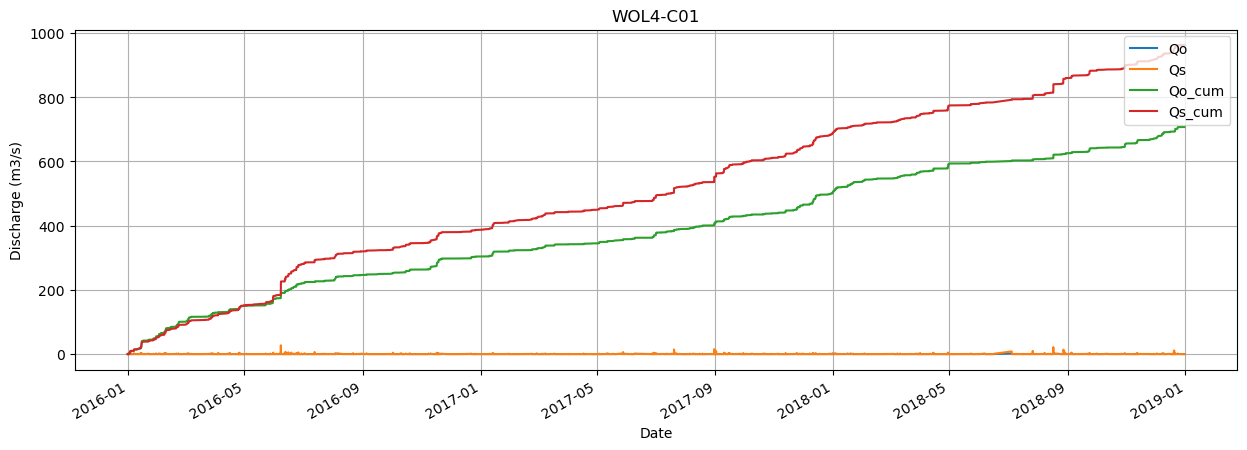

In [41]:
#make a cumulative plot of the data
data0['Qo_cum'] = data0['Qo'].cumsum()
data0['Qs_cum'] = data0['Qs'].cumsum()

plot = data0.plot(figsize=(15, 5))
plot.set_ylabel('Discharge (m3/s)')
plot.set_xlabel('Date')
plot.set_title('WOL4-C01')
plot.legend(loc='upper right')
plot.grid(True)
